<a href="https://colab.research.google.com/github/santule/ERA/blob/main/S10/session10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_lr_finder
!pip install torchsummary

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from torch_lr_finder import LRFinder
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F
from torchsummary import summary
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
%cd /content/drive/MyDrive/AI/ERA/session10
import model
import utils
import dataloader

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Mounted at /content/drive/
/content/drive/MyDrive/AI/ERA/session10


Load the data

In [3]:
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
train_loader,test_loader = dataloader.load_dataset()

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Check images

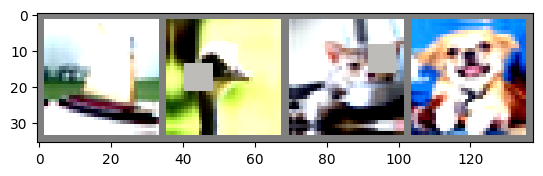

ship  bird  cat   dog  


In [4]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# show images
utils.imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

load the model and print

In [5]:
model_check = model.Net().to(device)
utils.summarise_model(model_check)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

Find the max LR

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.79E-02


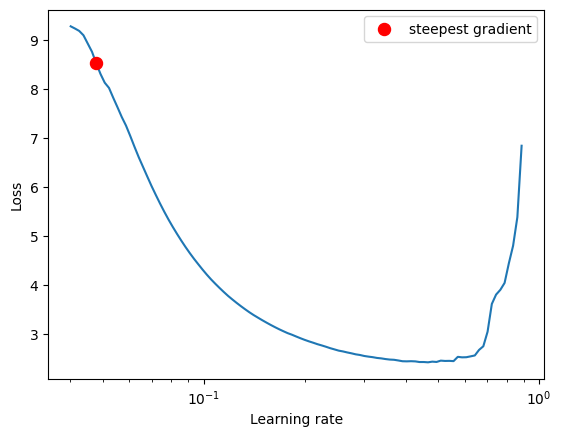

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_check.parameters(), lr=0.03, weight_decay=1e-4)
lr_finder = LRFinder(model_check, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200,step_mode='exp')
lr_finder.plot()  # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

Train the model

In [ ]:
EPOCHS = 24
scheduler = OneCycleLR(optimizer,
                       max_lr = 4.79E-02,
                       pct_start = 5/EPOCHS,
                       div_factor = 100,
                       epochs=EPOCHS,
                       steps_per_epoch=len(train_loader),
                       verbose = False,three_phase=False)
                       #final_div_factor= 100,anneal_strategy='linear')


for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model_check, device, train_loader, optimizer, epoch,criterion,scheduler)
    utils.test(model_check, device, test_loader,criterion)

EPOCH: 0


Loss=1.1380103826522827 Batch_id=390 Accuracy=56.47: 100%|██████████| 391/391 [00:20<00:00, 19.31it/s]



Test set: Average loss: 0.0085, Accuracy: 6432/10000 (64.32%)

EPOCH: 1


Loss=0.7019708156585693 Batch_id=390 Accuracy=68.03: 100%|██████████| 391/391 [00:20<00:00, 18.98it/s]



Test set: Average loss: 0.0062, Accuracy: 7307/10000 (73.07%)

EPOCH: 2


Loss=1.031100869178772 Batch_id=390 Accuracy=72.49: 100%|██████████| 391/391 [00:20<00:00, 18.83it/s]



Test set: Average loss: 0.0080, Accuracy: 6377/10000 (63.77%)

EPOCH: 3


Loss=0.8832475543022156 Batch_id=390 Accuracy=69.95: 100%|██████████| 391/391 [00:21<00:00, 18.62it/s]



Test set: Average loss: 0.0110, Accuracy: 5714/10000 (57.14%)

EPOCH: 4


Loss=0.7638875246047974 Batch_id=343 Accuracy=67.95:  88%|████████▊ | 343/391 [00:18<00:02, 19.17it/s]